In [84]:
import pandas as pd

In [85]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [86]:
train.head()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51
3,3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78
4,4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51


In [88]:
test.head()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
0,360336,7.24,4.0,1.0,0.0,2.0,10.80,0.0,1.0,7.0,20319.0,0.0,0.0,0.0,0.0,0.0
1,360337,6.90,2.0,2.0,2.0,3.0,8.51,1.0,0.0,4.0,33858.0,1.0,0.0,1.0,1.0,1.0
2,360338,8.34,3.0,0.0,0.0,3.0,8.77,0.0,1.0,14.0,39696.0,0.0,0.0,1.0,1.0,0.0
3,360339,5.48,2.0,3.0,3.0,2.0,21.90,1.0,0.0,9.0,23688.0,1.0,1.0,1.0,1.0,1.0
4,360340,4.80,3.0,2.0,0.0,2.0,10.90,1.0,0.0,11.0,27694.0,1.0,1.0,1.0,1.0,1.0


In [5]:
train.isnull().sum(),test.isnull().sum()

(id                            0
 store_sales(in millions)      0
 unit_sales(in millions)       0
 total_children                0
 num_children_at_home          0
 avg_cars_at home(approx).1    0
 gross_weight                  0
 recyclable_package            0
 low_fat                       0
 units_per_case                0
 store_sqft                    0
 coffee_bar                    0
 video_store                   0
 salad_bar                     0
 prepared_food                 0
 florist                       0
 cost                          0
 dtype: int64,
 id                            0
 store_sales(in millions)      0
 unit_sales(in millions)       0
 total_children                0
 num_children_at_home          0
 avg_cars_at home(approx).1    0
 gross_weight                  0
 recyclable_package            0
 low_fat                       0
 units_per_case                0
 store_sqft                    0
 coffee_bar                    0
 video_store                

In [6]:
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360336 entries, 0 to 360335
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          360336 non-null  int64  
 1   store_sales(in millions)    360336 non-null  float64
 2   unit_sales(in millions)     360336 non-null  float64
 3   total_children              360336 non-null  float64
 4   num_children_at_home        360336 non-null  float64
 5   avg_cars_at home(approx).1  360336 non-null  float64
 6   gross_weight                360336 non-null  float64
 7   recyclable_package          360336 non-null  float64
 8   low_fat                     360336 non-null  float64
 9   units_per_case              360336 non-null  float64
 10  store_sqft                  360336 non-null  float64
 11  coffee_bar                  360336 non-null  float64
 12  video_store                 360336 non-null  float64
 13  salad_bar     

(None, None)

In [7]:
train.shape,test.shape

((360336, 17), (240224, 16))

In [8]:
y=train['cost']
x=train.drop('cost',axis=1)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
base=RandomForestRegressor(n_estimators=100)

In [13]:
base.fit(x_train,y_train)

RandomForestRegressor(max_depth=5)

In [71]:
from sklearn.preprocessing import StandardScaler

In [73]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [77]:
x_train

array([[-0.70362399,  0.767741  , -0.05617645, ..., -1.01007615,
        -1.01015325,  0.99314793],
       [ 0.93087194,  0.20579839, -0.05617645, ..., -1.01007615,
        -1.01015325, -1.00689935],
       [ 0.48020747,  0.22392557, -0.05617645, ...,  0.99002436,
         0.9899488 ,  0.99314793],
       ...,
       [-0.4649493 , -0.53741603,  1.21842987, ..., -1.01007615,
        -1.01015325,  0.99314793],
       [-0.32143507,  1.23904771,  1.21842987, ..., -1.01007615,
        -1.01015325, -1.00689935],
       [-0.56079202,  1.5290826 , -0.05617645, ..., -1.01007615,
        -1.01015325, -1.00689935]])

In [29]:
import xgboost 

In [67]:
boost=xgboost.XGBRegressor(learning_rate=0.1,n_estimators=100,max_depth=5,gamma=1,n_jobs=50,random_state=42)

In [74]:
boost.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=50, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [114]:
y=boost.predict(x_test)

In [94]:
test.head()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,360336,7.24,4.0,1.0,0.0,2.0,10.80,0.0,1.0,7.0,20319.0,0.0,0.0,0.0,0.0,0.0,63.477352
1,360337,6.90,2.0,2.0,2.0,3.0,8.51,1.0,0.0,4.0,33858.0,1.0,0.0,1.0,1.0,1.0,66.863686
2,360338,8.34,3.0,0.0,0.0,3.0,8.77,0.0,1.0,14.0,39696.0,0.0,0.0,1.0,1.0,0.0,58.947380
3,360339,5.48,2.0,3.0,3.0,2.0,21.90,1.0,0.0,9.0,23688.0,1.0,1.0,1.0,1.0,1.0,68.628120
4,360340,4.80,3.0,2.0,0.0,2.0,10.90,1.0,0.0,11.0,27694.0,1.0,1.0,1.0,1.0,1.0,62.829060


In [100]:
b=test[['id','cost']]

In [101]:
b

,id,cost
0,360336,63.477352
1,360337,66.863686
2,360338,58.947380
3,360339,68.628120
4,360340,62.829060
...,...,...
240219,600555,75.244736
240220,600556,59.490864
240221,600557,60.501904
240222,600558,60.501904


In [107]:
b.to_csv('submission.csv',index=False)

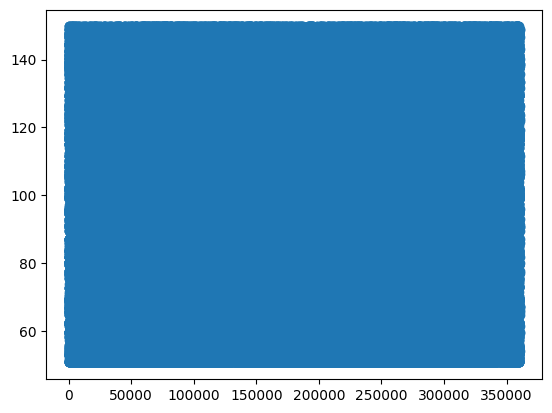

In [105]:
plt.scatter(train['id'],train['cost'])

In [64]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [76]:
r2_score(y_test,y)

0.08995576858220178

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
import numpy as np

In [26]:
type(y_train)

pandas.core.series.Series

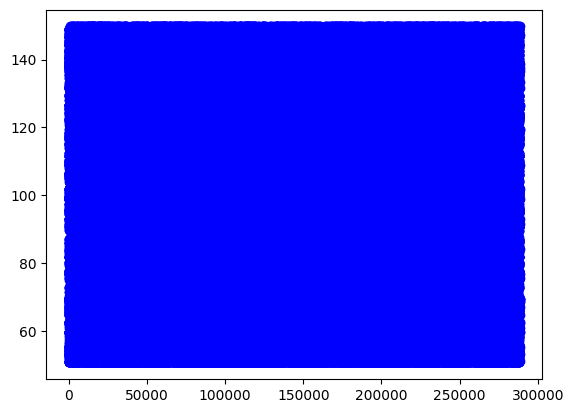

In [23]:
plt.scatter(np.arange(len(y_train)),y_train,c='blue')

In [ ]:
f

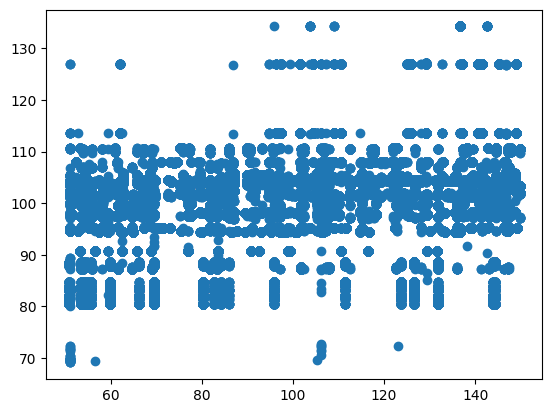

In [17]:
plt.scatter(y_train,y)
#plt.plot(y,color='red')

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r

ImportError: cannot import name 'r' from 'sklearn.metrics' (C:\Users\pavan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\__init__.py)

In [ ]:
mean_squared_error(y_train,y)

In [ ]:
plt.plot(y)
plt.plot(y_train,color='red')

In [ ]:
x=1,2,3,
y=2,1,3

In [ ]:
plt.plot(x)
plt.plot(y,color='red')

In [110]:
y_test=pd.DataFrame(y_test)

In [ ]:
plt.plot(y_test)

In [ ]:
plt.plot(y)